# Business Understanding

Option #1

Kickstarter wants to help make more projects successful (meet funding goal) because when projects are successful Kickstarter gets a cut of the funding. We rank the importance of features to get an understanding of what makes a project successful.  How much does staff_pick or spotlight influence the success? Time of launch-deadline? Category listings? Should we market ourselves to xxx, who is the most successful?

Option #2 

We have an idea we want to kickstart, is it critical that we have good rewards/get spotlight/get backers/ how long should the deadline be etc to hit a successful funding goal.



# Imports

In [61]:
import sys
import os
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join(os.pardir))
import json
from datetime import datetime as dt
if module_path not in sys.path:
    sys.path.append(module_path)
pd.set_option('max_columns', None)

# EDA

In [62]:
# df = pd.DataFrame()
# for f in glob('../data/Kickstarter*.csv'):
#     df = pd.concat([df, pd.read_csv(f)])

In [63]:
# df.info()
# df.to_csv('..data/Kickstarter_full.csv', index = False)

In [64]:
df = pd.read_csv('../data/Kickstarter_full.csv')

In [65]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,2,I am building a website as a platform for stud...,"{""id"":362,""name"":""Makerspaces"",""slug"":""technol...",8,AU,Australia,1526014096,"{""id"":576665900,""name"":""Emma - Teaching Little...",AUD,$,True,USD,1528928562,False,NaN,0.713110,1000.0,2116213542,NaN,False,NaN,1526336562,"{""id"":1102170,""name"":""Geelong"",""slug"":""geelong...",STEAM Challenges for kids,NaN,"{""key"":""assets/021/192/015/169fac7e245d13c5b2c...",11.32,"{""id"":3378817,""project_id"":3378817,""state"":""in...",steam-challenges-for-kids,https://www.kickstarter.com/discover/categorie...,False,False,failed,1528928562,0.754091,"{""web"":{""project"":""https://www.kickstarter.com...",8.536309,domestic
1,43,"For my first solo museum exhibition, I'm const...","{""id"":288,""name"":""Installations"",""slug"":""art/i...",3390,US,the United States,1490746168,"{""id"":1570512397,""name"":""Mark Reamy"",""is_regis...",USD,$,True,USD,1493819063,False,NaN,1.000000,3000.0,162726099,NaN,False,NaN,1491227063,"{""id"":1123319,""name"":""Gwangju-Si"",""slug"":""gwan...",Moving Mountains - An Exhibition in South Korea,NaN,"{""key"":""assets/016/043/280/779386fd82d6830e626...",3390.00,"{""id"":2940021,""project_id"":2940021,""state"":""in...",moving-mountains-an-exhibition-in-south-korea,https://www.kickstarter.com/discover/categorie...,True,True,successful,1493819064,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3390.000000,domestic
2,243,"Jenn lives in an underground bunker, protected...","{""id"":302,""name"":""Thrillers"",""slug"":""film & vi...",28601,US,the United States,1411536270,"{""id"":579435811,""name"":""Steve Desmond"",""is_reg...",USD,$,True,USD,1415844585,False,NaN,1.000000,16500.0,1678056872,NaN,False,NaN,1413248985,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Monsters - The Short Film,NaN,"{""key"":""assets/011/877/406/34b5aa93986724b6374...",28601.11,"{""id"":1376329,""project_id"":1376329,""state"":""in...",monsters-the-short-film,https://www.kickstarter.com/discover/categorie...,True,True,successful,1415844587,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28601.110000,domestic
3,2,I want to create a book that displays my work ...,"{""id"":278,""name"":""People"",""slug"":""photography/...",26,US,the United States,1420492380,"{""id"":528048907,""name"":""Brandi Carroll"",""is_re...",USD,$,True,USD,1423192306,False,NaN,1.000000,5000.0,1972792590,NaN,False,NaN,1420600306,"{""id"":2374330,""name"":""Caneyville"",""slug"":""cane...",Imagine,NaN,"{""key"":""assets/011/991/354/8497459c8c1bef38223...",26.00,"{""id"":1612632,""project_id"":1612632,""state"":""in...",imagine-0,https://www.kickstarter.com/discover/categorie...,False,False,failed,1423192306,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic
4,210,A series of hard enamel pins and accessories,"{""id"":26,""name"":""Crafts"",""slug"":""crafts"",""posi...",6516,GB,the United Kingdom,1593683203,"{""id"":926607047,""name"":""Laura Croft"",""slug"":""f...",GBP,£,False,USD,1598633946,False,NaN,1.301187,1000.0,928655800,NaN,False,NaN,1596214746,"{""id"":26279,""name"":""Lincoln"",""slug"":""lincoln-g...",Monsters and Maw Enamel Pins,NaN,"{""key"":""assets/029/762/429/cfde26eb92bacd30e93...",4919.00,"{""id"":4025596,""project_id"":4025596,""state"":""in...",monsters-and-maw-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,1598633946,1.298425,"{""web"":{""project"":""https://www.kickstarter.com...",6386.951345,domestic


In [66]:
df.state.value_counts(normalize = True)

successful    0.582305
failed        0.344952
canceled      0.041410
live          0.031334
Name: state, dtype: float64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219538 entries, 0 to 219537
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             219538 non-null  int64  
 1   blurb                     219532 non-null  object 
 2   category                  219538 non-null  object 
 3   converted_pledged_amount  219538 non-null  int64  
 4   country                   219538 non-null  object 
 5   country_displayable_name  219538 non-null  object 
 6   created_at                219538 non-null  int64  
 7   creator                   219538 non-null  object 
 8   currency                  219538 non-null  object 
 9   currency_symbol           219538 non-null  object 
 10  currency_trailing_code    219538 non-null  bool   
 11  current_currency          219538 non-null  object 
 12  deadline                  219538 non-null  int64  
 13  disable_communication     219538 non-null  b

# Data Cleaning

In [68]:
country_names = list(df.country_displayable_name.value_counts().index)
country_codes = list(df.country.value_counts().index)
countries = list(zip(country_names, country_codes))

From the .info we see a few columns that can be dropped because they don't have enough data

- `friend`
- `is_backing`
- `is_starred`
- `permission`

Additionally, there are a few unneeded or redundant columns
- `photo`
- `id`
- `currency_symbol`
- `country_displayable_name`
- `disable_communication`
- `fx_rate`
- `converted_pledged_amount`
- `currency_trailing_code`
- `current_currency`

In [69]:
df = df.drop(columns = ['friends',
                        'is_backing',
                        'is_starred',
                        'permissions',
                        'photo',
                        'id',
                        'currency_symbol',
                        'country_displayable_name',
                        'disable_communication',
                        'converted_pledged_amount',
                        'fx_rate',
                        'currency_trailing_code',
                        'current_currency'
                       ]
            )

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219538 entries, 0 to 219537
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   backers_count     219538 non-null  int64  
 1   blurb             219532 non-null  object 
 2   category          219538 non-null  object 
 3   country           219538 non-null  object 
 4   created_at        219538 non-null  int64  
 5   creator           219538 non-null  object 
 6   currency          219538 non-null  object 
 7   deadline          219538 non-null  int64  
 8   goal              219538 non-null  float64
 9   is_starrable      219538 non-null  bool   
 10  launched_at       219538 non-null  int64  
 11  location          219332 non-null  object 
 12  name              219538 non-null  object 
 13  pledged           219538 non-null  float64
 14  profile           219538 non-null  object 
 15  slug              219538 non-null  object 
 16  source_url        21

To deal with potential duplicate entries, rows with the same `blurb` and `launched_at` timestamp are dropped

In [71]:
df = df.drop_duplicates(subset = ['blurb', 'launched_at'])

We need to convert the date columns with object dtype unix timestamps into datetime objects.

In [72]:
df.created_at = df.created_at.apply(lambda x: dt.fromtimestamp(x))
df.launched_at = df.launched_at.apply(lambda x: dt.fromtimestamp(x))
df.deadline = df.deadline.apply(lambda x: dt.fromtimestamp(x))
df.state_changed_at = df.state_changed_at.apply(lambda x: dt.fromtimestamp(x))

To convert the `goal` feature into a consistent currency, the `usd_goal` is created using `static_usd_rate`

In [73]:
df['usd_goal'] = df.static_usd_rate * df.goal

In [74]:
df.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,is_starrable,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal
0,2,I am building a website as a platform for stud...,"{""id"":362,""name"":""Makerspaces"",""slug"":""technol...",AU,2018-05-11 00:48:16,"{""id"":576665900,""name"":""Emma - Teaching Little...",AUD,2018-06-13 18:22:42,1000.0,False,2018-05-14 18:22:42,"{""id"":1102170,""name"":""Geelong"",""slug"":""geelong...",STEAM Challenges for kids,11.32,"{""id"":3378817,""project_id"":3378817,""state"":""in...",steam-challenges-for-kids,https://www.kickstarter.com/discover/categorie...,False,False,failed,2018-06-13 18:22:42,0.754091,"{""web"":{""project"":""https://www.kickstarter.com...",8.536309,domestic,754.09094
1,43,"For my first solo museum exhibition, I'm const...","{""id"":288,""name"":""Installations"",""slug"":""art/i...",US,2017-03-28 20:09:28,"{""id"":1570512397,""name"":""Mark Reamy"",""is_regis...",USD,2017-05-03 09:44:23,3000.0,False,2017-04-03 09:44:23,"{""id"":1123319,""name"":""Gwangju-Si"",""slug"":""gwan...",Moving Mountains - An Exhibition in South Korea,3390.00,"{""id"":2940021,""project_id"":2940021,""state"":""in...",moving-mountains-an-exhibition-in-south-korea,https://www.kickstarter.com/discover/categorie...,True,True,successful,2017-05-03 09:44:24,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3390.000000,domestic,3000.00000
2,243,"Jenn lives in an underground bunker, protected...","{""id"":302,""name"":""Thrillers"",""slug"":""film & vi...",US,2014-09-24 01:24:30,"{""id"":579435811,""name"":""Steve Desmond"",""is_reg...",USD,2014-11-12 21:09:45,16500.0,False,2014-10-13 21:09:45,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Monsters - The Short Film,28601.11,"{""id"":1376329,""project_id"":1376329,""state"":""in...",monsters-the-short-film,https://www.kickstarter.com/discover/categorie...,True,True,successful,2014-11-12 21:09:47,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28601.110000,domestic,16500.00000
3,2,I want to create a book that displays my work ...,"{""id"":278,""name"":""People"",""slug"":""photography/...",US,2015-01-05 16:13:00,"{""id"":528048907,""name"":""Brandi Carroll"",""is_re...",USD,2015-02-05 22:11:46,5000.0,False,2015-01-06 22:11:46,"{""id"":2374330,""name"":""Caneyville"",""slug"":""cane...",Imagine,26.00,"{""id"":1612632,""project_id"":1612632,""state"":""in...",imagine-0,https://www.kickstarter.com/discover/categorie...,False,False,failed,2015-02-05 22:11:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic,5000.00000
4,210,A series of hard enamel pins and accessories,"{""id"":26,""name"":""Crafts"",""slug"":""crafts"",""posi...",GB,2020-07-02 05:46:43,"{""id"":926607047,""name"":""Laura Croft"",""slug"":""f...",GBP,2020-08-28 12:59:06,1000.0,False,2020-07-31 12:59:06,"{""id"":26279,""name"":""Lincoln"",""slug"":""lincoln-g...",Monsters and Maw Enamel Pins,4919.00,"{""id"":4025596,""project_id"":4025596,""state"":""in...",monsters-and-maw-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-08-28 12:59:06,1.298425,"{""web"":{""project"":""https://www.kickstarter.com...",6386.951345,domestic,1298.42475


In [75]:
df.currency.value_counts()

USD    133128
GBP     21420
EUR     14356
CAD      9035
AUD      4546
MXN      2775
SEK      1351
HKD      1203
NZD       856
DKK       843
SGD       736
CHF       666
JPY       490
NOK       466
PLN         4
Name: currency, dtype: int64

In [76]:
df.creator = df.creator.apply(lambda x: x.replace(' "', " ").replace('" '," "))

In [77]:
df.category = df.category.apply(json.loads)

In [78]:
df['category_name'] = df.category.apply(lambda x: x['name'])

In [79]:
df.category_name.value_counts()

Web               3936
Comedy            2930
Apparel           2401
Comic Books       2401
Product Design    2401
                  ... 
Residencies         89
Letterpress         79
Chiptune            52
Conceptual Art      28
Taxidermy           11
Name: category_name, Length: 161, dtype: int64

In [80]:
def get_parent(data):
    """
    grabs parent category if available, otherwise grabs child category
    """
    pass
        

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191875 entries, 0 to 219536
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   backers_count     191875 non-null  int64         
 1   blurb             191869 non-null  object        
 2   category          191875 non-null  object        
 3   country           191875 non-null  object        
 4   created_at        191875 non-null  datetime64[ns]
 5   creator           191875 non-null  object        
 6   currency          191875 non-null  object        
 7   deadline          191875 non-null  datetime64[ns]
 8   goal              191875 non-null  float64       
 9   is_starrable      191875 non-null  bool          
 10  launched_at       191875 non-null  datetime64[ns]
 11  location          191671 non-null  object        
 12  name              191875 non-null  object        
 13  pledged           191875 non-null  float64       
 14  prof

## Feature Engineering

- has prior success
- rate of funding (fast funder, slow funder)
- # of words in blurb


#### Has prior success

From the creator dictionary string, the user id is pulled, and then that id is used to check if that user has more than 1 successful campaign.

In [82]:
def checkit(string):
    i = 0
    for letter in string:
        if letter.isdigit():
            i += 1
        else:
            break
    return i
df['creator_id'] = df.creator.apply(lambda x: int(x[6:6+checkit(x[6:])]))
temp = df.creator_id.value_counts()
df['has_prior_success'] = [1 if temp.loc[x] > 1 else 0 for x in df.creator_id]

In [83]:
df.has_prior_success.value_counts()

0    147580
1     44295
Name: has_prior_success, dtype: int64

#### Project length

We want to determine if the length of a project has an effect on the success of the campaign.

In [84]:
df['project_length'] = df.deadline - df.launched_at

In [85]:
len(df.blurb[0].split())

21

#### Blurb Length

To see if the number of words in the blurb is important to the success of a project.

In [86]:
df['blurb_length'] = [len(str(x).split()) for x in df.blurb]

#### Pledge per backer

In [87]:
df.backers_count.value_counts()

0       15885
1       15434
2       10694
3        7331
4        5255
        ...  
2373        1
4422        1
6599        1
3013        1
1726        1
Name: backers_count, Length: 3410, dtype: int64

In [88]:
df['pledge_per_backer'] = np.where(df.backers_count == 0, 0, df.usd_pledged / df.backers_count)

#### Goal timedelta

In [89]:
df['goal_needed_per_day'] = df.usd_goal / df.project_length.apply(lambda x: x.days)

In [90]:
df['raised_per_day'] = df.usd_pledged / df.project_length.apply(lambda x: x.days)

In [91]:
df.columns

Index(['backers_count', 'blurb', 'category', 'country', 'created_at',
       'creator', 'currency', 'deadline', 'goal', 'is_starrable',
       'launched_at', 'location', 'name', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'usd_goal',
       'category_name', 'creator_id', 'has_prior_success', 'project_length',
       'blurb_length', 'pledge_per_backer', 'goal_needed_per_day',
       'raised_per_day'],
      dtype='object')

In [92]:
df.usd_type.value_counts()

domestic         146370
international     45263
Name: usd_type, dtype: int64

In [93]:
df.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,is_starrable,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal,category_name,creator_id,has_prior_success,project_length,blurb_length,pledge_per_backer,goal_needed_per_day,raised_per_day
0,2,I am building a website as a platform for stud...,"{'id': 362, 'name': 'Makerspaces', 'slug': 'te...",AU,2018-05-11 00:48:16,"{""id"":576665900,""name"":""Emma - Teaching Little...",AUD,2018-06-13 18:22:42,1000.0,False,2018-05-14 18:22:42,"{""id"":1102170,""name"":""Geelong"",""slug"":""geelong...",STEAM Challenges for kids,11.32,"{""id"":3378817,""project_id"":3378817,""state"":""in...",steam-challenges-for-kids,https://www.kickstarter.com/discover/categorie...,False,False,failed,2018-06-13 18:22:42,0.754091,"{""web"":{""project"":""https://www.kickstarter.com...",8.536309,domestic,754.09094,Makerspaces,576665900,0,30 days,21,4.268155,25.136365,0.284544
1,43,"For my first solo museum exhibition, I'm const...","{'id': 288, 'name': 'Installations', 'slug': '...",US,2017-03-28 20:09:28,"{""id"":1570512397,""name"":""Mark Reamy"",""is_regis...",USD,2017-05-03 09:44:23,3000.0,False,2017-04-03 09:44:23,"{""id"":1123319,""name"":""Gwangju-Si"",""slug"":""gwan...",Moving Mountains - An Exhibition in South Korea,3390.00,"{""id"":2940021,""project_id"":2940021,""state"":""in...",moving-mountains-an-exhibition-in-south-korea,https://www.kickstarter.com/discover/categorie...,True,True,successful,2017-05-03 09:44:24,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3390.000000,domestic,3000.00000,Installations,1570512397,0,30 days,21,78.837209,100.000000,113.000000
2,243,"Jenn lives in an underground bunker, protected...","{'id': 302, 'name': 'Thrillers', 'slug': 'film...",US,2014-09-24 01:24:30,"{""id"":579435811,""name"":""Steve Desmond"",""is_reg...",USD,2014-11-12 21:09:45,16500.0,False,2014-10-13 21:09:45,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Monsters - The Short Film,28601.11,"{""id"":1376329,""project_id"":1376329,""state"":""in...",monsters-the-short-film,https://www.kickstarter.com/discover/categorie...,True,True,successful,2014-11-12 21:09:47,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28601.110000,domestic,16500.00000,Thrillers,579435811,0,30 days,23,117.700041,550.000000,953.370333
3,2,I want to create a book that displays my work ...,"{'id': 278, 'name': 'People', 'slug': 'photogr...",US,2015-01-05 16:13:00,"{""id"":528048907,""name"":""Brandi Carroll"",""is_re...",USD,2015-02-05 22:11:46,5000.0,False,2015-01-06 22:11:46,"{""id"":2374330,""name"":""Caneyville"",""slug"":""cane...",Imagine,26.00,"{""id"":1612632,""project_id"":1612632,""state"":""in...",imagine-0,https://www.kickstarter.com/discover/categorie...,False,False,failed,2015-02-05 22:11:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic,5000.00000,People,528048907,0,30 days,28,13.000000,166.666667,0.866667
4,210,A series of hard enamel pins and accessories,"{'id': 26, 'name': 'Crafts', 'slug': 'crafts',...",GB,2020-07-02 05:46:43,"{""id"":926607047,""name"":""Laura Croft"",""slug"":""f...",GBP,2020-08-28 12:59:06,1000.0,False,2020-07-31 12:59:06,"{""id"":26279,""name"":""Lincoln"",""slug"":""lincoln-g...",Monsters and Maw Enamel Pins,4919.00,"{""id"":4025596,""project_id"":4025596,""state"":""in...",monsters-and-maw-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-08-28 12:59:06,1.298425,"{""web"":{""project"":""https://www.kickstarter.com...",6386.951345,domestic,1298.42475,Crafts,926607047,1,28 days,8,30.414054,46.372312,228.105405


## Visualizations

In [94]:
df.state.value_counts(normalize=True)

successful    0.542916
failed        0.390145
canceled      0.047380
live          0.019560
Name: state, dtype: float64

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


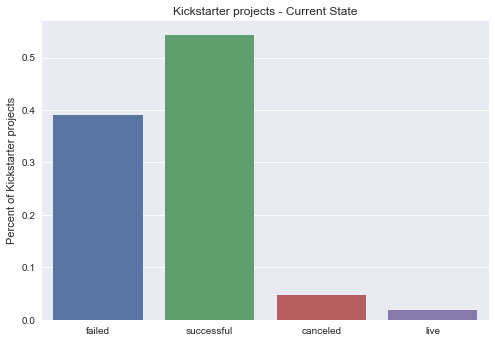

In [95]:
plt.style.use('seaborn')
sns.set_color_codes()
sns.barplot(df.state.value_counts().index,df.state.value_counts(normalize=True),
            order=['failed','successful','canceled','live'])
sns.set_palette('muted')
plt.gca().set_ylabel('Percent of Kickstarter projects')
plt.gca().set_title('Kickstarter projects - Current State');
plt.savefig('State.png')


In [96]:
df.describe()

,backers_count,goal,pledged,static_usd_rate,usd_pledged,usd_goal,creator_id,has_prior_success,project_length,blurb_length,pledge_per_backer,goal_needed_per_day,raised_per_day
count,191875.000000,1.918750e+05,1.918750e+05,191875.000000,1.918750e+05,1.918750e+05,1.918750e+05,191875.000000,191875,191875.000000,191875.000000,1.918750e+05,191875.000000
mean,143.192078,5.658185e+04,2.523714e+04,1.002913,1.297071e+04,4.444230e+04,1.073746e+09,0.230853,33 days 04:02:10.745084039,18.206416,71.626206,1.413972e+03,416.309390
std,931.486798,1.326879e+06,1.332593e+06,0.238635,1.044167e+05,1.220692e+06,6.206653e+08,0.421380,12 days 05:34:32.900475016,5.484321,141.394844,6.052567e+04,3320.093268
min,0.000000,1.000000e+00,0.000000e+00,0.008771,0.000000e+00,5.114279e-01,3.000000e+00,0.000000,1 days 00:00:00,1.000000,0.000000,1.072667e-02,0.000000
25%,3.000000,1.500000e+03,1.000000e+02,1.000000,9.000000e+01,1.500000e+03,5.354431e+08,0.000000,30 days 00:00:00,15.000000,19.556111,5.000000e+01,2.633333
50%,25.000000,5.000000e+03,1.442000e+03,1.000000,1.392000e+03,5.000000e+03,1.073968e+09,0.000000,30 days 00:00:00,19.000000,44.803922,1.555556e+02,48.094220
75%,86.000000,1.500000e+04,6.600000e+03,1.000000,6.245000e+03,1.300000e+04,1.611487e+09,0.000000,35 days 00:00:00,22.000000,82.546691,4.166667e+02,212.976643
max,105857.000000,1.000000e+08,4.816218e+08,1.716408,1.296961e+07,1.523501e+08,2.147483e+09,1.000000,97 days 18:45:46,43.000000,10000.000000,1.375000e+07,418374.451613


In [56]:
matrix_df = df[['backers_count','usd_pledged','usd_goal','blurb_length','has_prior_success',
       'pledge_per_backer', 'goal_needed_per_day', 'raised_per_day','state']].copy()

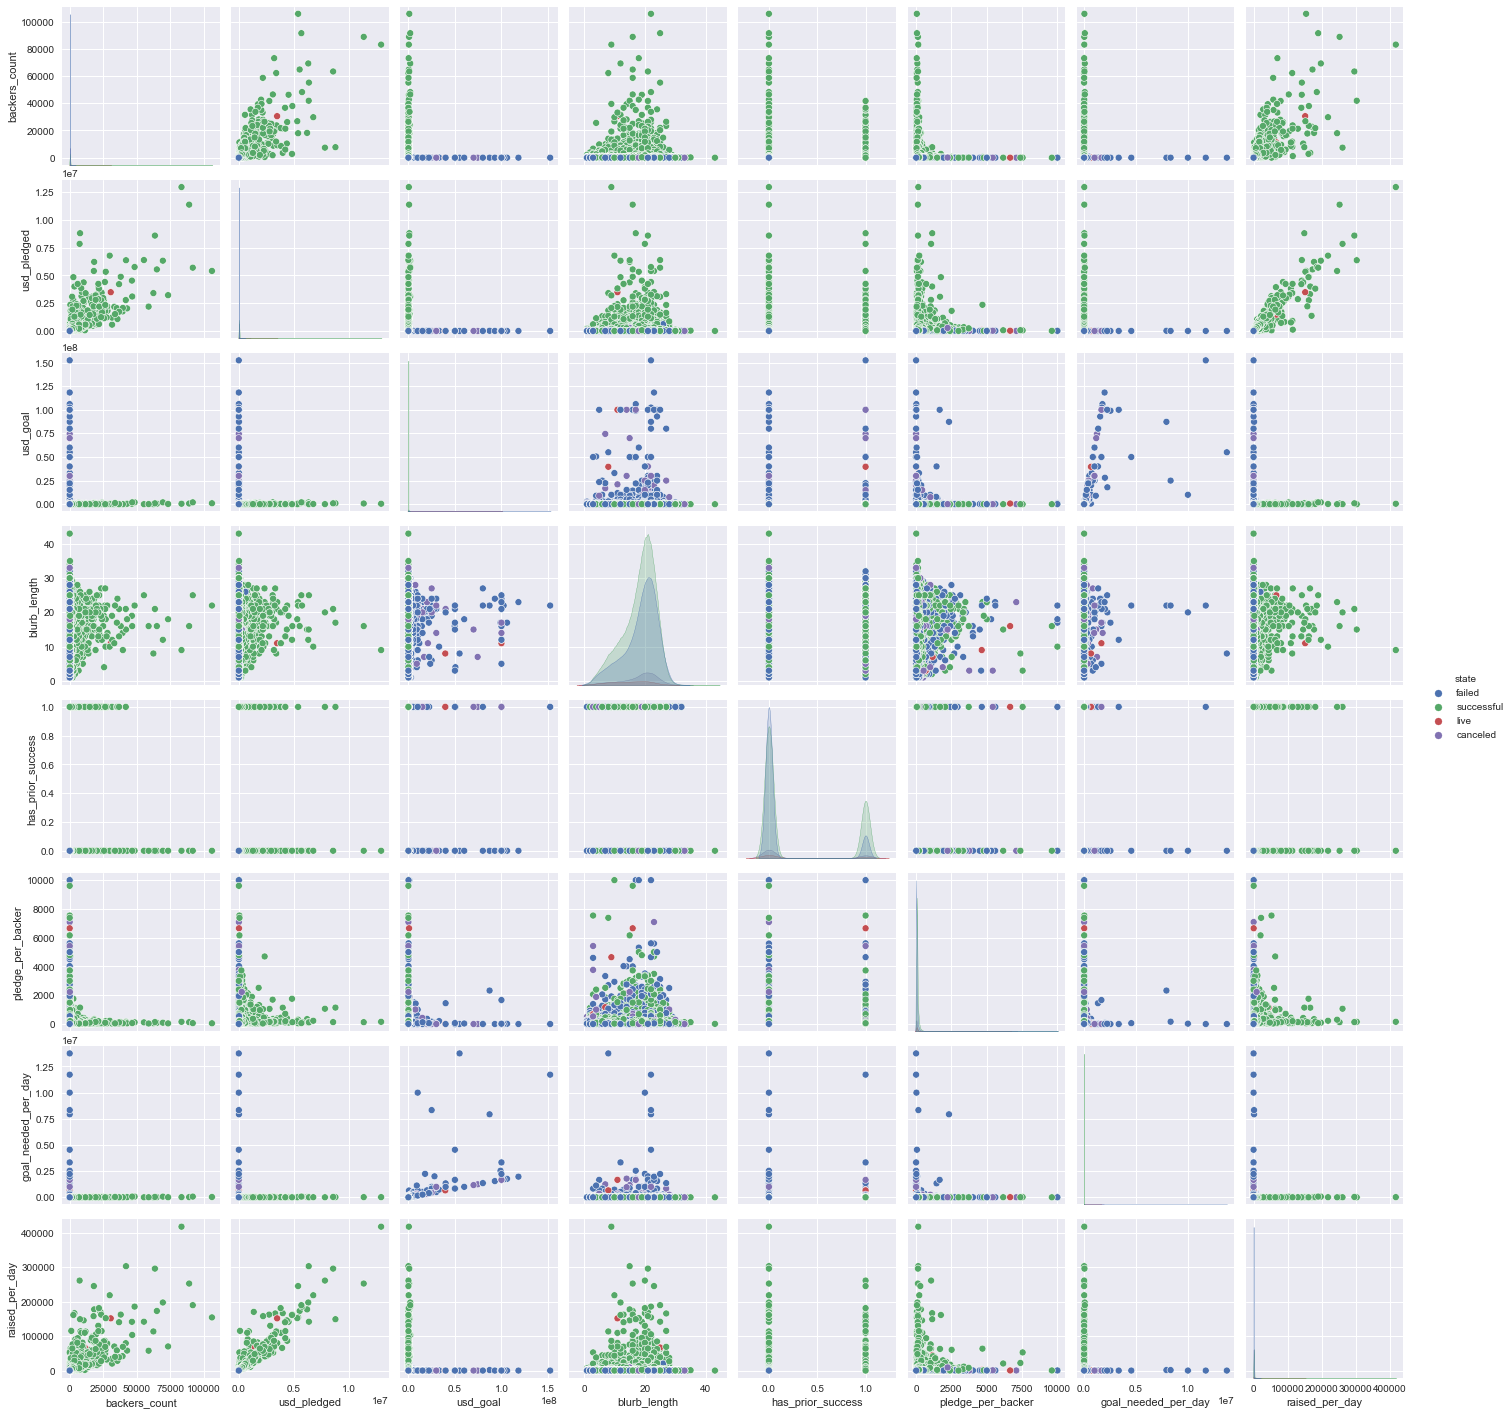

In [57]:
sns.pairplot(matrix_df,hue='state')

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='usd_goal'>

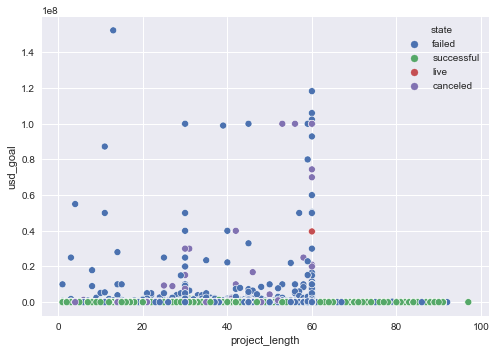

In [211]:
#no successful projects over $100,000 goal
sns.scatterplot(df.project_length.apply(lambda x: x.days),df.usd_goal,hue=df.state.sort_values(ascending=False))

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='pledged'>

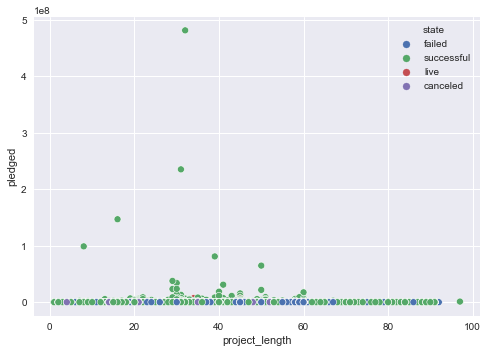

In [49]:
sns.scatterplot(df.project_length.apply(lambda x: x.days),df.pledged,hue=df.state)

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='backers_count'>

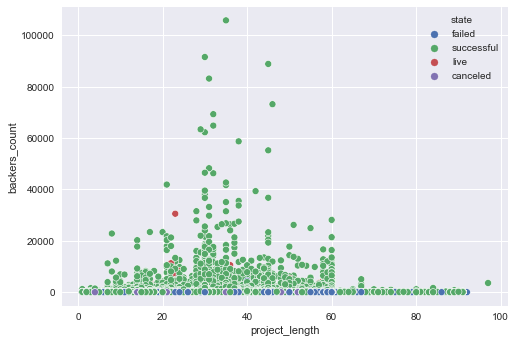

In [50]:
sns.scatterplot(df.project_length.apply(lambda x: x.days),df.backers_count,hue=df.state)

<AxesSubplot:xlabel='backers_count', ylabel='usd_goal'>

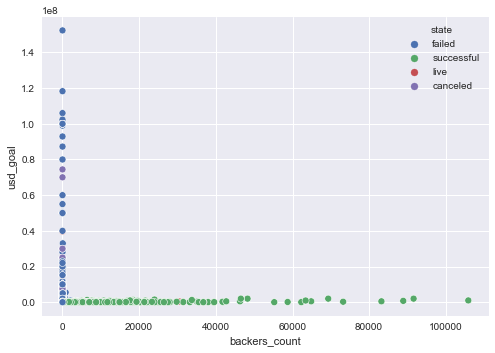

In [58]:
sns.scatterplot(x='backers_count',y='usd_goal',data=df,hue='state')

In [97]:
df_lim = df.copy()

In [98]:
df_lim.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,is_starrable,launched_at,location,name,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal,category_name,creator_id,has_prior_success,project_length,blurb_length,pledge_per_backer,goal_needed_per_day,raised_per_day
0,2,I am building a website as a platform for stud...,"{'id': 362, 'name': 'Makerspaces', 'slug': 'te...",AU,2018-05-11 00:48:16,"{""id"":576665900,""name"":""Emma - Teaching Little...",AUD,2018-06-13 18:22:42,1000.0,False,2018-05-14 18:22:42,"{""id"":1102170,""name"":""Geelong"",""slug"":""geelong...",STEAM Challenges for kids,11.32,"{""id"":3378817,""project_id"":3378817,""state"":""in...",steam-challenges-for-kids,https://www.kickstarter.com/discover/categorie...,False,False,failed,2018-06-13 18:22:42,0.754091,"{""web"":{""project"":""https://www.kickstarter.com...",8.536309,domestic,754.09094,Makerspaces,576665900,0,30 days,21,4.268155,25.136365,0.284544
1,43,"For my first solo museum exhibition, I'm const...","{'id': 288, 'name': 'Installations', 'slug': '...",US,2017-03-28 20:09:28,"{""id"":1570512397,""name"":""Mark Reamy"",""is_regis...",USD,2017-05-03 09:44:23,3000.0,False,2017-04-03 09:44:23,"{""id"":1123319,""name"":""Gwangju-Si"",""slug"":""gwan...",Moving Mountains - An Exhibition in South Korea,3390.00,"{""id"":2940021,""project_id"":2940021,""state"":""in...",moving-mountains-an-exhibition-in-south-korea,https://www.kickstarter.com/discover/categorie...,True,True,successful,2017-05-03 09:44:24,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",3390.000000,domestic,3000.00000,Installations,1570512397,0,30 days,21,78.837209,100.000000,113.000000
2,243,"Jenn lives in an underground bunker, protected...","{'id': 302, 'name': 'Thrillers', 'slug': 'film...",US,2014-09-24 01:24:30,"{""id"":579435811,""name"":""Steve Desmond"",""is_reg...",USD,2014-11-12 21:09:45,16500.0,False,2014-10-13 21:09:45,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",Monsters - The Short Film,28601.11,"{""id"":1376329,""project_id"":1376329,""state"":""in...",monsters-the-short-film,https://www.kickstarter.com/discover/categorie...,True,True,successful,2014-11-12 21:09:47,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28601.110000,domestic,16500.00000,Thrillers,579435811,0,30 days,23,117.700041,550.000000,953.370333
3,2,I want to create a book that displays my work ...,"{'id': 278, 'name': 'People', 'slug': 'photogr...",US,2015-01-05 16:13:00,"{""id"":528048907,""name"":""Brandi Carroll"",""is_re...",USD,2015-02-05 22:11:46,5000.0,False,2015-01-06 22:11:46,"{""id"":2374330,""name"":""Caneyville"",""slug"":""cane...",Imagine,26.00,"{""id"":1612632,""project_id"":1612632,""state"":""in...",imagine-0,https://www.kickstarter.com/discover/categorie...,False,False,failed,2015-02-05 22:11:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic,5000.00000,People,528048907,0,30 days,28,13.000000,166.666667,0.866667
4,210,A series of hard enamel pins and accessories,"{'id': 26, 'name': 'Crafts', 'slug': 'crafts',...",GB,2020-07-02 05:46:43,"{""id"":926607047,""name"":""Laura Croft"",""slug"":""f...",GBP,2020-08-28 12:59:06,1000.0,False,2020-07-31 12:59:06,"{""id"":26279,""name"":""Lincoln"",""slug"":""lincoln-g...",Monsters and Maw Enamel Pins,4919.00,"{""id"":4025596,""project_id"":4025596,""state"":""in...",monsters-and-maw-enamel-pins,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-08-28 12:59:06,1.298425,"{""web"":{""project"":""https://www.kickstarter.com...",6386.951345,domestic,1298.42475,Crafts,926607047,1,28 days,8,30.414054,46.372312,228.105405


In [99]:
df_lim.backers_count.quantile(.98)

1103.0

In [100]:
df_lim.backers_count = np.where(df_lim.backers_count > df_lim.backers_count.quantile(.98),
                                df_lim.backers_count.quantile(.98),
                                df_lim.backers_count)

df_lim.usd_goal = np.where(df_lim.usd_goal > df_lim.usd_goal.quantile(.98),
                                df_lim.usd_goal.quantile(.98),
                                df_lim.usd_goal)

df_lim.raised_per_day = np.where(df_lim.raised_per_day > df_lim.raised_per_day.quantile(.98),
                                df_lim.raised_per_day.quantile(.98),
                                df_lim.raised_per_day)

df_lim.pledge_per_backer = np.where(df_lim.pledge_per_backer > df_lim.pledge_per_backer.quantile(.98),
                                df_lim.pledge_per_backer.quantile(.98),
                                df_lim.pledge_per_backer)

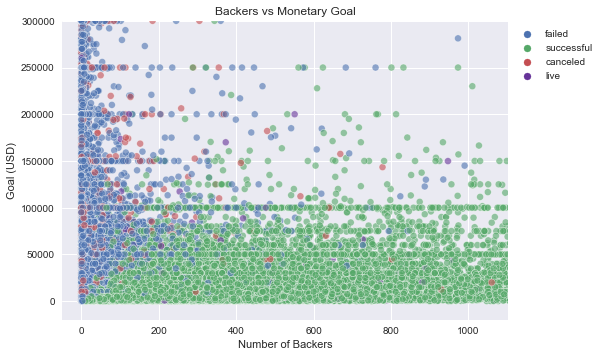

In [101]:
p = sns.color_palette(['b','g','r','rebeccapurple'])
sns.scatterplot(x='backers_count',y='usd_goal',data=df,hue='state',
                hue_order=['failed','successful','canceled','live'],palette=p,alpha=.6);
plt.xlim((-50,df.backers_count.quantile(.98)))
plt.ylim((-20000,df.usd_goal.quantile(.99)))
plt.ylabel('Goal (USD)')
plt.xlabel('Number of Backers')
plt.title('Backers vs Monetary Goal')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.savefig('backers_vs_goal.png',bbox_inches='tight')

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='backers_count'>

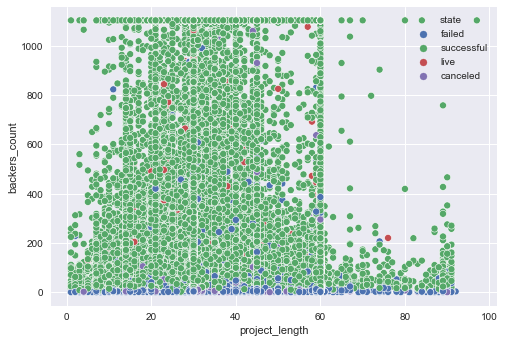

In [76]:
sns.scatterplot(df.project_length.apply(lambda x: x.days),df_lim.backers_count,hue=df_lim.state)

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='project_length', ylabel='backers_count'>

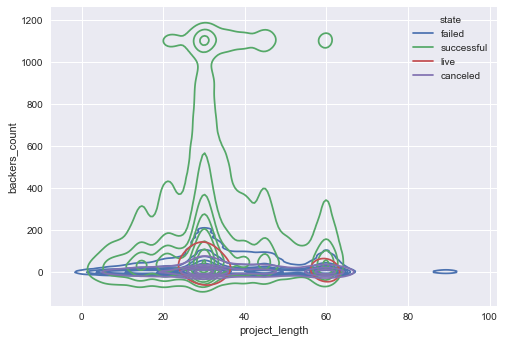

In [77]:
sns.kdeplot(df.project_length.apply(lambda x: x.days),df_lim.backers_count,hue=df_lim.state)

<AxesSubplot:xlabel='raised_per_day', ylabel='pledge_per_backer'>

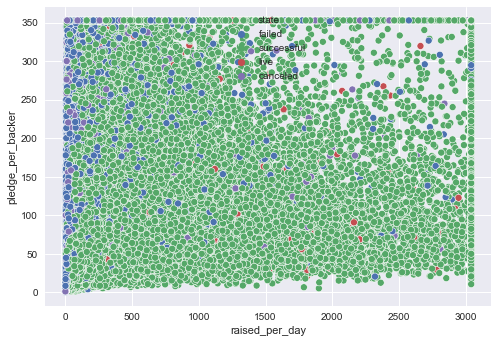

In [83]:
sns.scatterplot(x='raised_per_day',y='pledge_per_backer',data=df_lim,hue='state')

In [84]:
df.columns

Index(['backers_count', 'blurb', 'category', 'country', 'created_at',
       'creator', 'currency', 'deadline', 'goal', 'is_starrable',
       'launched_at', 'location', 'name', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'usd_goal',
       'creator_id', 'has_prior_success', 'project_length', 'blurb_length',
       'pledge_per_backer', 'goal_needed_per_day', 'raised_per_day'],
      dtype='object')

In [103]:
numeric = ['backers_count', 'usd_pledged', 
           'usd_goal', 'blurb_length','pledge_per_backer', 'goal_needed_per_day', 'raised_per_day']

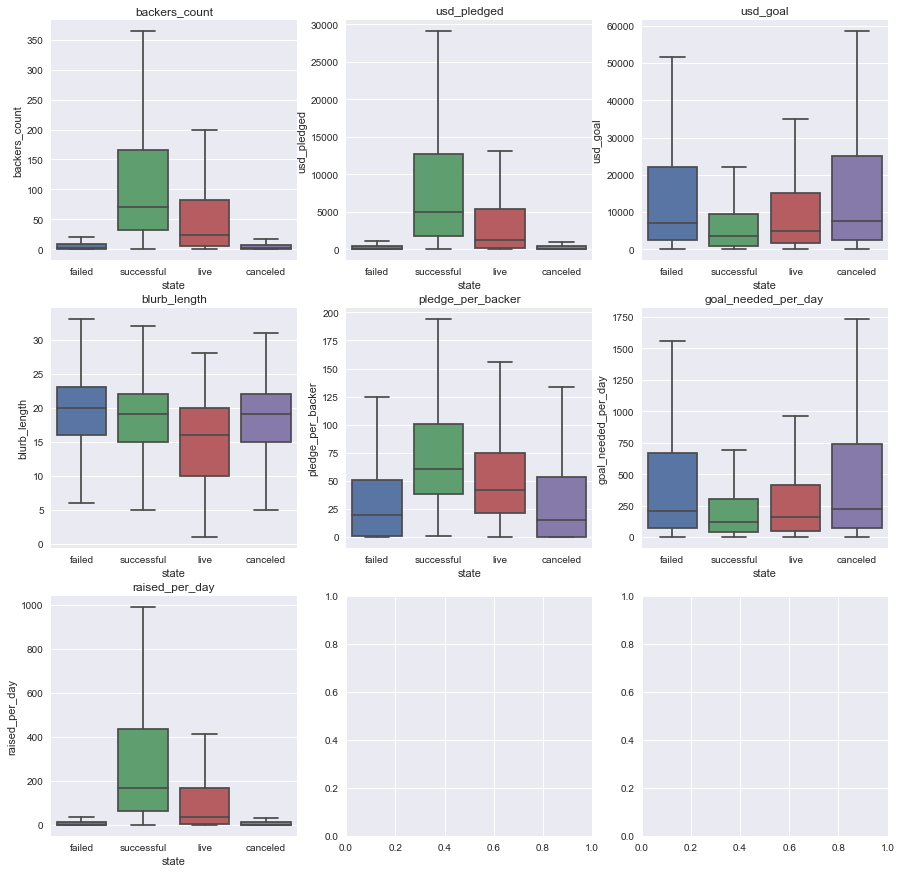

In [186]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i,col in enumerate(numeric):
    sns.boxplot(x='state',y=col,data=df,ax=ax[i//3][i%3], showfliers = False)
    ax[i//3][i%3].set_title(col)
    

In [102]:
df['project_days'] = df.project_length.apply(lambda x: x.days)

In [103]:
df.project_days.describe()

count    191875.000000
mean         33.030129
std          12.248102
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          97.000000
Name: project_days, dtype: float64

In [104]:
df.groupby(['staff_pick']).state.value_counts(normalize=True)

staff_pick  state     
False       successful    0.494385
            failed        0.433286
            canceled      0.052391
            live          0.019939
True        successful    0.878986
            failed        0.091401
            live          0.016934
            canceled      0.012680
Name: state, dtype: float64

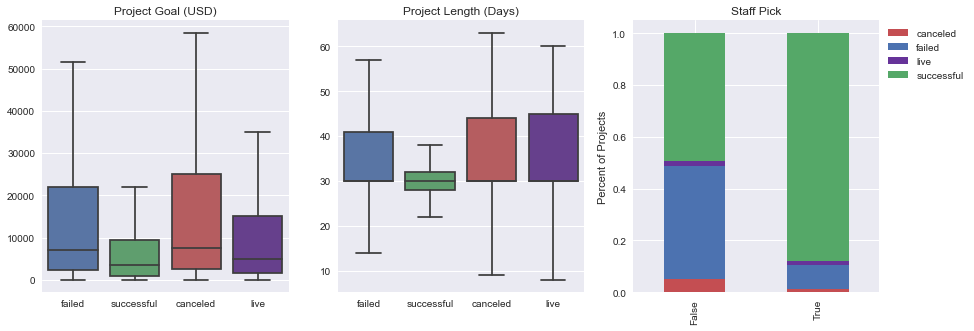

In [105]:
fig, ax = plt.subplots(ncols=3,nrows=1)
fig.set_figheight(5)
fig.set_figwidth(15)

sns.boxplot(x='state',y='usd_goal',data=df,ax=ax[0],order=['failed','successful','canceled','live'],
            showfliers=False,palette=p)

ax[0].set_title('Project Goal (USD)')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.boxplot(x='state',y=df.project_days,
            data=df,ax=ax[1],order=['failed','successful','canceled','live'],
            showfliers=False,palette=p)

ax[1].set_title('Project Length (Days)')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

df.groupby(['staff_pick']).state.value_counts(normalize=True).\
            unstack().plot.bar(stacked=True, ax=ax[2], color=['r','b','rebeccapurple','g'])

ax[2].legend(bbox_to_anchor=(1, 1),loc='upper left')
ax[2].set_title('Staff Pick')
ax[2].set_xlabel('')
ax[2].set_ylabel('Percent of Projects')


plt.savefig('goal_day_boxplot.png')    

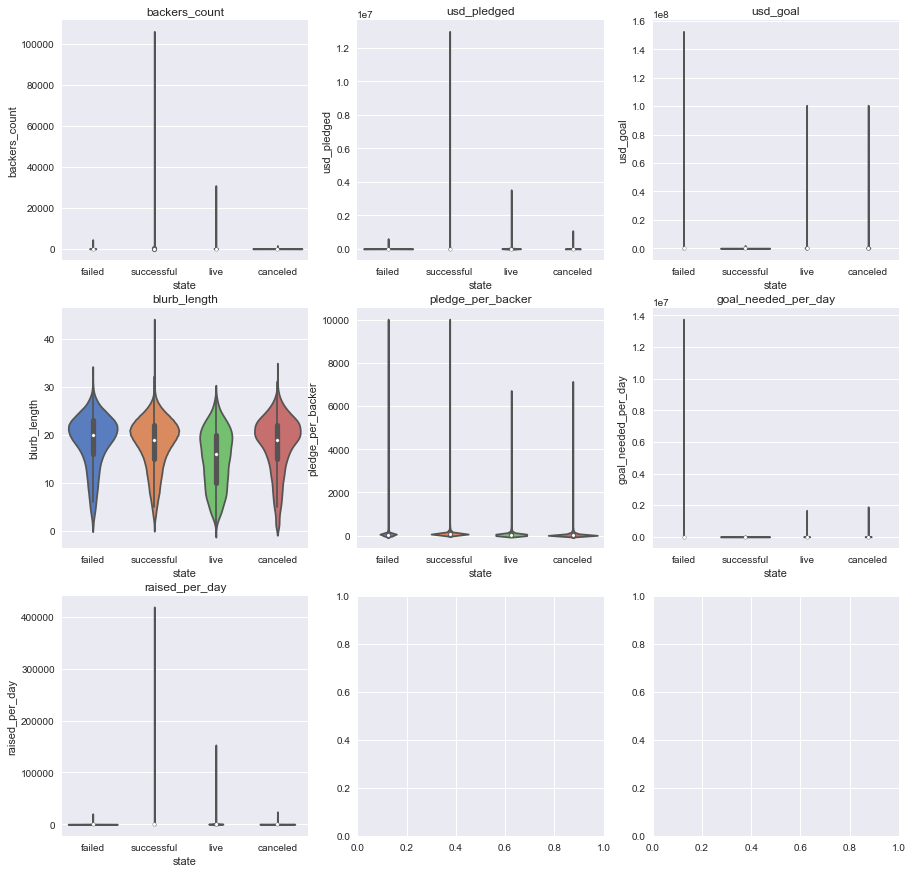

In [106]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

for i,col in enumerate(numeric):
    sns.violinplot(x='state',y=col,data=df,ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(col)

<AxesSubplot:xlabel='spotlight'>

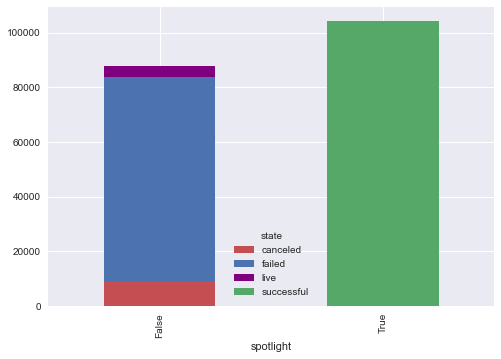

In [110]:
df.groupby(['spotlight']).state.value_counts().unstack().plot.bar(stacked=True,color=['r','b','purple','g'])

<AxesSubplot:xlabel='staff_pick'>

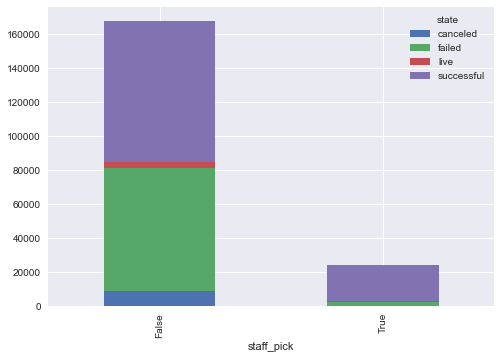

In [136]:
df.groupby(['staff_pick']).state.value_counts().unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='staff_pick'>

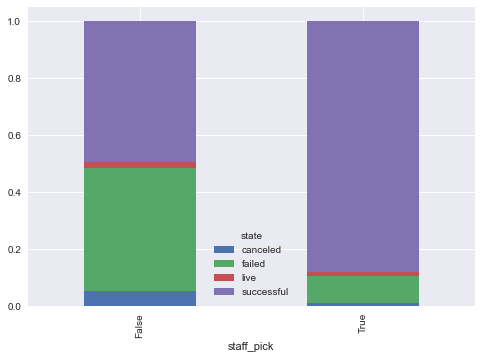

In [138]:
df.groupby(['staff_pick']).state.value_counts(normalize=True).unstack().plot.bar(stacked=True)

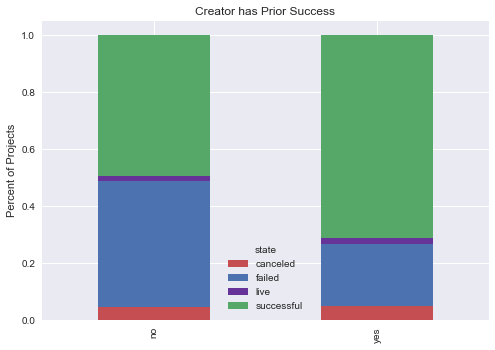

In [111]:
df.groupby(['has_prior_success']).state.value_counts(normalize=True).unstack()\
            .plot.bar(stacked=True, color=['r','b','rebeccapurple','g'])
plt.gca().set_xticklabels(['no','yes'])
plt.xlabel('')
plt.title('Creator has Prior Success')
plt.ylabel('Percent of Projects')
plt.savefig('prior_success.png')

In [112]:
top_25_cat = list(df.category_name.value_counts()[:25].index)
top_50_cat = list(df.category_name.value_counts()[:50].index)

In [113]:
df.category_name.value_counts()[:51]

Web                 3936
Comedy              2930
Apparel             2401
Comic Books         2401
Product Design      2401
Country & Folk      2400
World Music         2400
Graphic Design      2400
Illustration        2400
Painting            2400
Fiction             2400
Mobile Games        2400
Art Books           2400
Drama               2400
Video Games         2400
Tabletop Games      2400
Graphic Novels      2400
Mixed Media         2400
Rock                2400
Documentary         2400
Children's Books    2400
Drinks              2400
Pop                 2400
Playing Cards       2400
Animation           2400
Performance Art     2400
Software            2400
Gadgets             2400
Shorts              2400
Webseries           2400
Public Art          2400
Apps                2400
Electronic Music    2400
Accessories         2400
Narrative Film      2400
Restaurants         2400
Hardware            2400
Classical Music     2400
Indie Rock          2400
Nonfiction          2400


In [114]:
df.loc[df.category_name.apply(lambda x: x in top_50_cat)].groupby(['category_name'])\
        .state.value_counts(normalize=True).unstack().sort_values('successful', ascending=False)

state,canceled,failed,live,successful
category_name,,,,
Rock,NaN,NaN,0.007083,0.992917
Country & Folk,NaN,NaN,0.008333,0.991667
Indie Rock,NaN,NaN,0.008750,0.991250
Shorts,NaN,NaN,0.014167,0.985833
Documentary,NaN,NaN,0.020417,0.979583
Nonfiction,NaN,NaN,0.021250,0.978750
Fiction,NaN,NaN,0.032500,0.967500
Accessories,NaN,NaN,0.044167,0.955833
Illustration,NaN,NaN,0.046250,0.953750


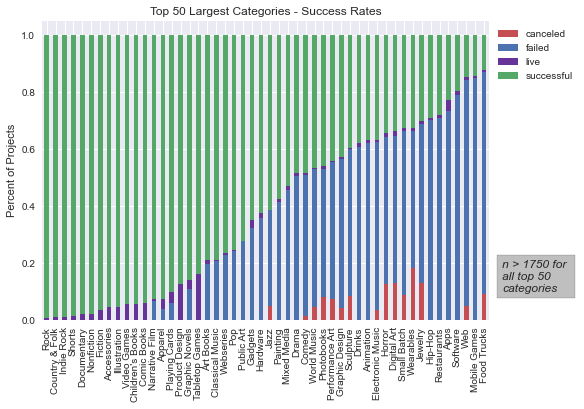

In [115]:
df.loc[df.category_name.apply(lambda x: x in top_50_cat)].groupby(['category_name'])\
        .state.value_counts(normalize=True).unstack().sort_values('successful', ascending=False)\
        .plot.bar(stacked=True,color=['r','b','rebeccapurple','g'])
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Top 50 Largest Categories - Success Rates')
plt.xlabel('')

plt.text(51, .1, 'n > 1750 for \nall top 50\ncategories', style='italic', fontsize=12,
        bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5})
plt.ylabel('Percent of Projects')
plt.savefig('category.png',bbox_inches='tight')

In [341]:
df.columns

Index(['backers_count', 'blurb', 'category', 'country', 'created_at',
       'creator', 'currency', 'deadline', 'goal', 'is_starrable',
       'launched_at', 'location', 'name', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'usd_goal',
       'creator_id', 'has_prior_success', 'project_length', 'blurb_length',
       'pledge_per_backer', 'goal_needed_per_day', 'raised_per_day',
       'category_name', 'project_days'],
      dtype='object')